<a href="https://colab.research.google.com/github/muhammad-naeem-tahir/Assignments/blob/main/PIAIC129482_Muhammad_Naeem_Tahir_compress_strength_concrete_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete (1).csv


In [4]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['compresive_strength_concrete.csv']))

In [5]:
import tensorflow as tf

In [6]:
df2.head(5)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df2.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [9]:
df2.isnull().sum()


Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [10]:
df2.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

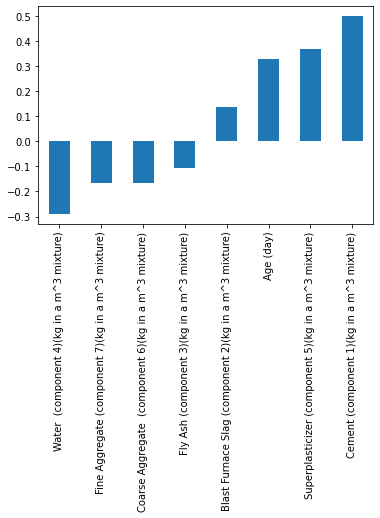

In [14]:
df2.corr()['Concrete compressive strength(MPa, megapascals) '].sort_values().drop('Concrete compressive strength(MPa, megapascals) ').plot(kind='bar')

In [13]:
df2.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [15]:
np.random.seed(11221)
msk = np.random.rand(len(df2)) <= 0.50
train_total = df2[msk]
temp = df2[~msk]
msk1 = np.random.rand(len(temp)) <= 0.60
test_total = temp[msk1]
val_total = temp[~msk1]

In [16]:
print(len(train_total),len(test_total),len(val_total))

488 318 224


In [17]:
print(len(df2))

1030


In [18]:
print(train_total.dtypes)

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object


In [20]:
train_label = train_total.loc[:,'Concrete compressive strength(MPa, megapascals) ']
test_label = test_total.loc[:,'Concrete compressive strength(MPa, megapascals) ']
val_label = val_total.loc[:,'Concrete compressive strength(MPa, megapascals) ']

In [21]:
test_data= test_total.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
train_data= train_total.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])
val_data= val_total.drop(columns = ['Concrete compressive strength(MPa, megapascals) '])

In [22]:
train_data.shape

(488, 8)

In [23]:
{train_data.columns.get_loc(c): c for idx, c in enumerate(train_data.columns)}

{0: 'Cement (component 1)(kg in a m^3 mixture)',
 1: 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 2: 'Fly Ash (component 3)(kg in a m^3 mixture)',
 3: 'Water  (component 4)(kg in a m^3 mixture)',
 4: 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 5: 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 6: 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 7: 'Age (day)'}

In [24]:
mean = train_data.iloc[:,0:7].mean(axis=0) # taking the mean of 
train_data.iloc[:,0:7] -= mean
std = train_data.iloc[:,0:7].std(axis=0)
train_data.iloc[:,0:7] /= std
test_data.iloc[:,0:7] -= mean
test_data.iloc[:,0:7] /= std
val_data.iloc[:,0:7] -= mean
val_data.iloc[:,0:7] /= std

In [25]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label
val_label -= mean_label
val_label /= std_label

In [26]:
train = np.array(train_data.iloc[:]).astype(np.float32)
test = np.array(test_data.iloc[:]).astype(np.float32)
val = np.array(val_data.iloc[:]).astype(np.float32)

In [27]:
train.shape

(488, 8)

In [28]:
train_lab = np.array(train_label.astype(np.float32))
test_lab = np.array(test_label.astype('float32'))
val_lab = np.array(val_label.astype('float32'))

In [29]:
from keras import models
from keras import layers
def build_model(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError()])
  return model

In [30]:
# dropout model
from keras import regularizers
def build_model_drop(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [31]:
# Regularized model
from keras import regularizers
def build_model_regular(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(train.shape[1],)))
  model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [50]:
from keras import regularizers
def build_model_drop1(act):
  model = models.Sequential()
  model.add(layers.Dense(32, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(64, activation= act))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(128, activation= act))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(64, activation= act))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(16, activation= act))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [34]:
model1=build_model('relu')

In [35]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [39]:
train.reshape(488,8,1)

array([[[ 2.5737426e+00],
        [-8.2651091e-01],
        [-8.5743809e-01],
        ...,
        [ 7.7669072e-01],
        [-1.2643602e+00],
        [ 2.8000000e+01]],

       [[ 9.8982114e-01],
        [ 2.7031758e-01],
        [-8.5743809e-01],
        ...,
        [-5.9876651e-01],
        [-2.3084700e+00],
        [ 3.6500000e+02]],

       [[-1.3872297e-01],
        [ 4.8968330e-01],
        [-8.5743809e-01],
        ...,
        [-5.9876651e-01],
        [-1.3407584e+00],
        [ 2.8000000e+01]],

       ...,

       [[-1.1286739e+00],
        [ 2.1718719e+00],
        [-8.5743809e-01],
        ...,
        [-1.5310209e+00],
        [ 6.5578324e-01],
        [ 2.8000000e+01]],

       [[-3.5768066e-02],
        [ 5.1277441e-01],
        [ 5.6343758e-01],
        ...,
        [-1.3871073e+00],
        [-8.9100018e-02],
        [ 2.8000000e+01]],

       [[-1.8921047e-01],
        [ 3.3381820e-01],
        [ 3.7461689e-01],
        ...,
        [-1.4584273e+00],
        [-1.756

In [40]:
test.reshape(318,8,1)

array([[[ 2.5737426e+00],
        [-8.2651091e-01],
        [-8.5743809e-01],
        ...,
        [ 9.6772641e-01],
        [-1.2643602e+00],
        [ 2.8000000e+01]],

       [[ 5.1959443e-01],
        [ 8.1873184e-01],
        [-8.5743809e-01],
        ...,
        [-5.9876651e-01],
        [-2.3084700e+00],
        [ 2.7000000e+02]],

       [[-1.3872297e-01],
        [ 4.8968330e-01],
        [-8.5743809e-01],
        ...,
        [-5.9876651e-01],
        [-1.3407584e+00],
        [ 9.0000000e+01]],

       ...,

       [[ 3.7506160e-01],
        [-8.2651091e-01],
        [ 1.1330466e+00],
        ...,
        [-1.5093701e+00],
        [-4.9273759e-01],
        [ 2.8000000e+01]],

       [[ 4.1762948e-01],
        [-8.2651091e-01],
        [ 9.6153456e-01],
        ...,
        [-2.0519116e+00],
        [ 4.8516038e-01],
        [ 2.8000000e+01]],

       [[-1.1969806e+00],
        [ 1.3290458e+00],
        [-8.5743809e-01],
        ...,
        [ 1.3481067e-01],
        [ 1.732

In [41]:
val.reshape(224,8,1)

array([[[ 5.1959443e-01],
        [ 8.1873184e-01],
        [-8.5743809e-01],
        ...,
        [-5.9876651e-01],
        [-2.3084700e+00],
        [ 3.6500000e+02]],

       [[-8.0594993e-01],
        [ 7.0212168e-01],
        [-8.5743809e-01],
        ...,
        [-7.8293327e-03],
        [ 6.3923025e-01],
        [ 3.6000000e+02]],

       [[ 9.8982114e-01],
        [ 2.7031758e-01],
        [-8.5743809e-01],
        ...,
        [-5.9876651e-01],
        [-2.3084700e+00],
        [ 2.8000000e+01]],

       ...,

       [[ 4.0970987e-01],
        [-8.2651091e-01],
        [ 1.1550758e+00],
        ...,
        [-1.3871073e+00],
        [ 5.6056716e-02],
        [ 2.8000000e+01]],

       [[-1.5357223e-01],
        [ 4.5504659e-01],
        [ 5.0364435e-01],
        ...,
        [-1.8646965e+00],
        [ 1.9230032e-01],
        [ 2.8000000e+01]],

       [[-1.3019154e+00],
        [ 7.8294063e-01],
        [ 8.5138911e-01],
        ...,
        [-1.1031008e+00],
        [ 5.987

In [44]:
import numpy as np
history=model1.fit(
    train,
    train_lab,
    batch_size=1,
    epochs=100,
    validation_data=(val,val_lab))

Epoch 1/100
488/488 [==============================] - 1s 2ms/step - loss: 42.0882 - mean_absolute_error: 3.2343 - val_loss: 0.4392 - val_mean_absolute_error: 0.5270
Epoch 2/100
488/488 [==============================] - 1s 1ms/step - loss: 0.6329 - mean_absolute_error: 0.5890 - val_loss: 0.4899 - val_mean_absolute_error: 0.5626
Epoch 3/100
488/488 [==============================] - 1s 1ms/step - loss: 0.4548 - mean_absolute_error: 0.4995 - val_loss: 0.7471 - val_mean_absolute_error: 0.6510
Epoch 4/100
488/488 [==============================] - 1s 1ms/step - loss: 0.5037 - mean_absolute_error: 0.5154 - val_loss: 0.2451 - val_mean_absolute_error: 0.4065
Epoch 5/100
488/488 [==============================] - 1s 1ms/step - loss: 0.4431 - mean_absolute_error: 0.4766 - val_loss: 0.8601 - val_mean_absolute_error: 0.7077
Epoch 6/100
488/488 [==============================] - 1s 1ms/step - loss: 0.3835 - mean_absolute_error: 0.4497 - val_loss: 0.2149 - val_mean_absolute_error: 0.3702
Epoch 7/1

In [47]:
model_reg=build_model_regular('relu')
history_reg=model_reg.fit(
    train,
    train_lab,
    batch_size=1,
    epochs=100,
    validation_data=(val,val_lab))

Epoch 1/100
488/488 [==============================] - 1s 2ms/step - loss: 1.1391 - mae: 0.8456 - val_loss: 0.7640 - val_mae: 0.6948
Epoch 2/100
488/488 [==============================] - 1s 1ms/step - loss: 0.7467 - mae: 0.6537 - val_loss: 0.5353 - val_mae: 0.5352
Epoch 3/100
488/488 [==============================] - 1s 1ms/step - loss: 0.5876 - mae: 0.5651 - val_loss: 0.3485 - val_mae: 0.4434
Epoch 4/100
488/488 [==============================] - 1s 1ms/step - loss: 0.5355 - mae: 0.5111 - val_loss: 0.3929 - val_mae: 0.4344
Epoch 5/100
488/488 [==============================] - 1s 1ms/step - loss: 0.4361 - mae: 0.4756 - val_loss: 0.2848 - val_mae: 0.4023
Epoch 6/100
488/488 [==============================] - 1s 1ms/step - loss: 0.3883 - mae: 0.4243 - val_loss: 0.3300 - val_mae: 0.4363
Epoch 7/100
488/488 [==============================] - 1s 1ms/step - loss: 0.4098 - mae: 0.4555 - val_loss: 0.2723 - val_mae: 0.3887
Epoch 8/100
488/488 [==============================] - 1s 1ms/step - 

In [51]:
model_drop1=build_model_drop1('relu')
history_drop1=model_drop1.fit(
    train,
    train_lab,
    batch_size=1,
    epochs=100,
    validation_data=(val,val_lab))

Epoch 1/100
488/488 [==============================] - 2s 2ms/step - loss: 7.9523 - mae: 1.4911 - val_loss: 0.8850 - val_mae: 0.7564
Epoch 2/100
488/488 [==============================] - 1s 1ms/step - loss: 1.0902 - mae: 0.8137 - val_loss: 0.7082 - val_mae: 0.6705
Epoch 3/100
488/488 [==============================] - 1s 1ms/step - loss: 1.2567 - mae: 0.7955 - val_loss: 0.6680 - val_mae: 0.6057
Epoch 4/100
488/488 [==============================] - 1s 1ms/step - loss: 0.7733 - mae: 0.6485 - val_loss: 0.5580 - val_mae: 0.5753
Epoch 5/100
488/488 [==============================] - 1s 1ms/step - loss: 0.9162 - mae: 0.6527 - val_loss: 0.4377 - val_mae: 0.5012
Epoch 6/100
488/488 [==============================] - 1s 1ms/step - loss: 0.7159 - mae: 0.6387 - val_loss: 0.4383 - val_mae: 0.4947
Epoch 7/100
488/488 [==============================] - 1s 1ms/step - loss: 0.8625 - mae: 0.6240 - val_loss: 0.2927 - val_mae: 0.4278
Epoch 8/100
488/488 [==============================] - 1s 1ms/step - 

In [52]:
test_mse_score, test_mae_score = model1.evaluate(test, test_lab)

10/10 [==============================] - 0s 2ms/step - loss: 0.1857 - mean_absolute_error: 0.3112


In [53]:
test_mse_score, test_mae_score = model_reg.evaluate(test, test_lab)

10/10 [==============================] - 0s 2ms/step - loss: 0.1912 - mae: 0.2919


In [55]:
test_mse_score, test_mae_score = model_drop1.evaluate(test, test_lab)

10/10 [==============================] - 0s 2ms/step - loss: 0.1631 - mae: 0.2973


In [57]:
x_1 = model1.predict(test[5].reshape(1,test.shape[1]))
x_1 * std_label + mean_label

array([[43.891953]], dtype=float32)

In [58]:
x_2 = model_reg.predict(test[5].reshape(1,test.shape[1]))
x_2 * std_label + mean_label

array([[49.277992]], dtype=float32)

In [59]:
x_3 = model_drop1.predict(test[5].reshape(1,test.shape[1]))
x_3 * std_label + mean_label

array([[40.874214]], dtype=float32)